# 01 How Models Work

basit manada model nasıl karar verir;

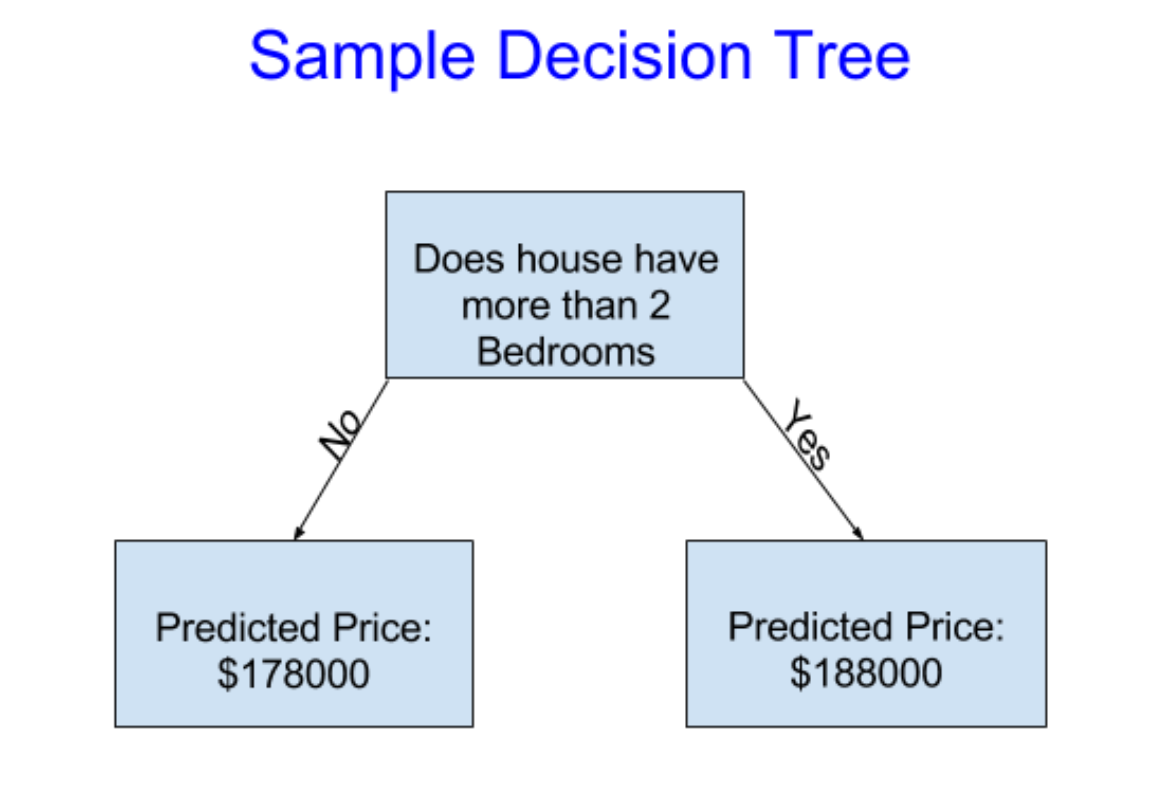

## Karar Ağacını İyileştirmek

aşağıdaki kararlardan hangisi daha mantıklıdır? Büyük ihtimalle soldaki karar ağacının daha mantıklı olduğunu düşünüyorsunuz.

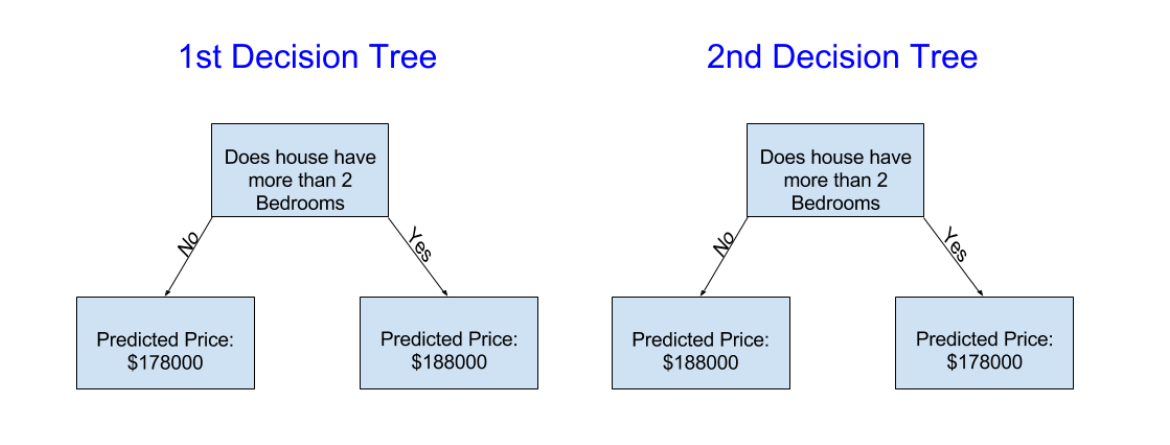

Alınan karar miktarını arttırma;

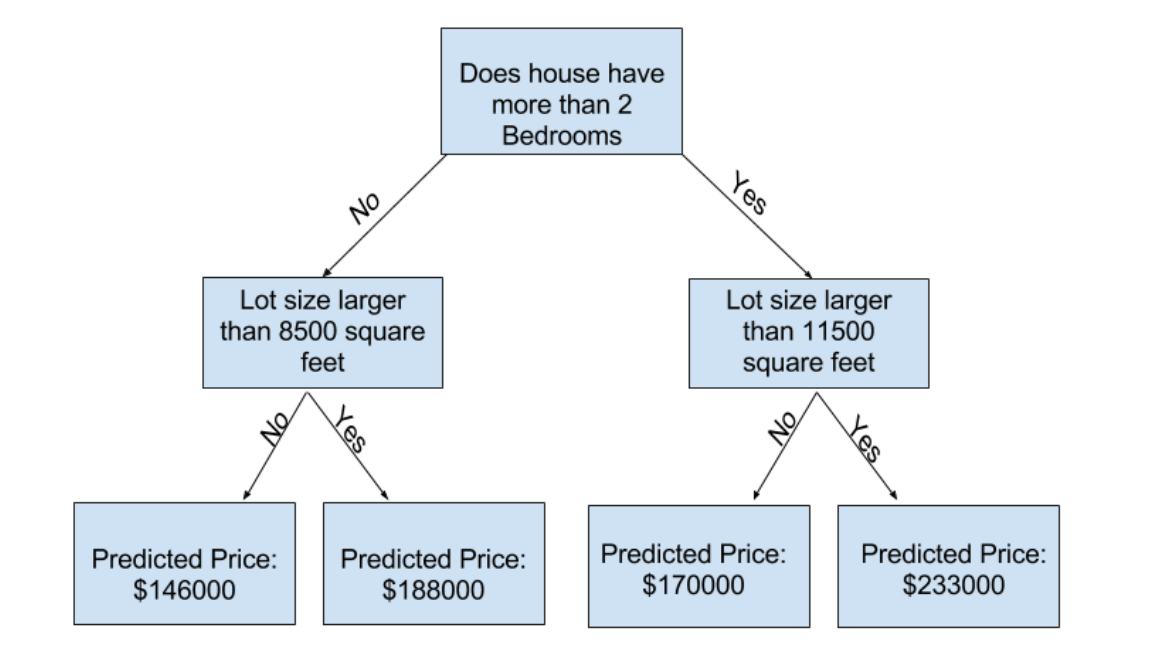

Tahmin yapılan her karar hücresine **yaprak** denir.

---

# 2 Basic Data Exploration

## Using Pandas to Get Familiar With Your Data

In [1]:
import pandas as pd

In [2]:
# save filepath to variable for easier access
melbourne_file_path = 'melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


---

# 3 Your First Machine Learning Model

## Selecting Data for Modeling

In [3]:
import pandas as pd

melbourne_file_path = 'melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

In [5]:
y = melbourne_data.Price

## Choosing "Features"

In [6]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [7]:
# Özellikler seçilerek x değişkenine atandı
X = melbourne_data[melbourne_features]

In [8]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [9]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


---
## Building Your Model

Bir model oluşturma ve kullanma adımları şunlardır:

* **Tanımla:** Ne tür bir model olacak? Bir karar ağacı mı? Başka bir model türü? Model tipinin diğer bazı parametreleri de belirtilmiştir.

* **Uygula:** Sağlanan verilerden kalıpları yakalayın. Bu, modellemenin kalbidir.

* **Tahmin yürüt:** Kulağa tam olarak nasıl geliyor

* **Değerlendir**: Modelin tahminlerinin ne kadar doğru olduğunu belirleyin.

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [11]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


---

# 4 Model Validation

## What is Model Validation

```
error=actual−predicted
```

MAE, yapılan tahmin ile gerçek değer arasındaki farkın bütün değerler için ortalamasıdır.

In [1]:
# Data Loading Code Hidden Here
import pandas as pd

# Load data
melbourne_file_path = 'melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing price values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.tree import DecisionTreeRegressor
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor()

In [2]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

434.71594577146544

## The Problem with "In-Sample" Scores

In [3]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

270285.0568108457


---

# 5 Underfitting and Overfitting

## Experimenting With Different Models

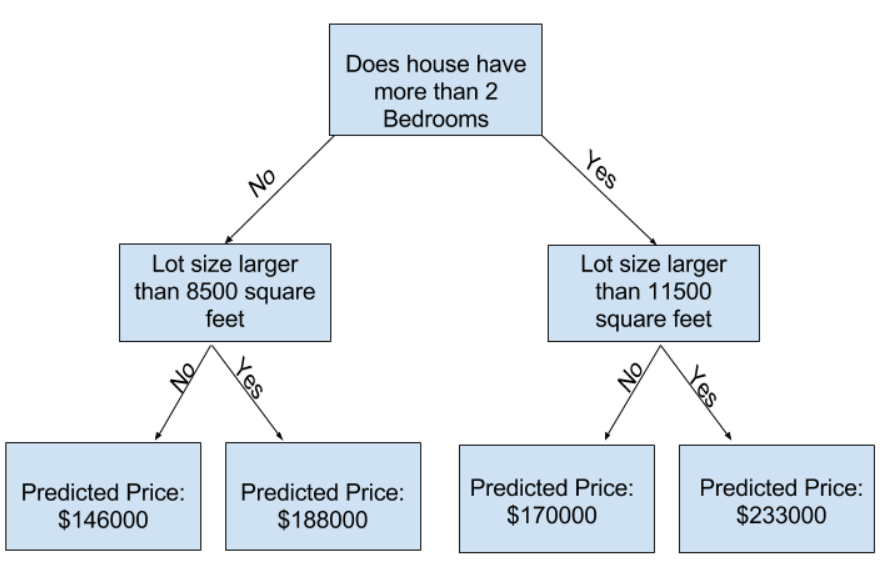

- **Overfitting:** gelecekte tekrarlanmayacak sahte kalıpları yakalamak, daha az doğru tahminlere yol açmak 
- **Underfitting:** ilgili kalıpları yakalayamamak, yine daha az doğru tahminlere yol açmak 

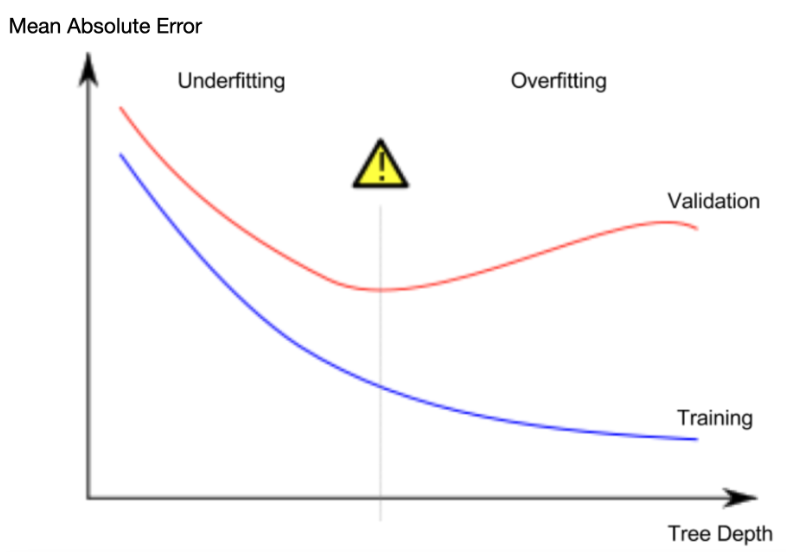

## Example

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [16]:
# Data Loading Code Runs At This Point
import pandas as pd
    
# Load data
melbourne_file_path = 'melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

We can use a for-loop to compare the accuracy of models built with different values for *max_leaf_nodes.*

In [17]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

# 500 yaprak optimum yaprak sayısı olarak gözükmektedir.

Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  258171
Max leaf nodes: 500  		 Mean Absolute Error:  243495
Max leaf nodes: 5000  		 Mean Absolute Error:  255015


---

# 6 Random Forests

## Example

In [18]:
import pandas as pd
    
# Load data
melbourne_file_path = 'melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing values
melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

191656.64906176025


---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-machine-learning/discussion) to chat with other learners.*